## INTERN NAME : Prishita Das
### TASK 1 : Prediction using Supervised ML
### LEVEL : Beginner
### Task Description:
#### To predict the percentage scored by a student based on the number of study hours
#### What will be the predicted score if a student studies for 9.25hr/day?

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Reading the dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Our Explanatory Variable : Hours
###### Our Response Variable : Score

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is a high correlation between our explanatory variable(Hours) and Response variables(Scores)

## Plotting the data

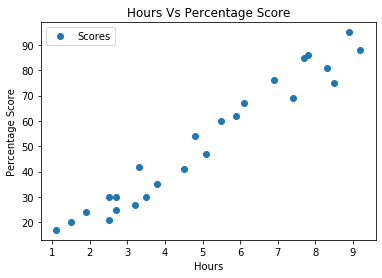

In [10]:
data.plot(x="Hours", y="Scores", style = "o")
plt.title("Hours Vs Percentage Score")
plt.xlabel("Hours")
plt.ylabel("Percentage Score")
plt.show()

## Data Preparation

In [11]:
#Dividing the data into inputs and outputs
x = data.iloc[:,0:1].values
y = data.iloc[:,-1].values

In [12]:
#Splitting the data into training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

## Training the Model

In [13]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train,y_train)
print("Model Trained Successful")

Model Trained Successful


In [14]:
print(lreg.coef_,lreg.intercept_)

[9.91065648] 2.018160041434683


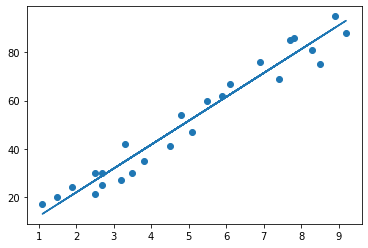

In [15]:
#Plotting the Best fit line
best_fit_line = lreg.intercept_ + lreg.coef_*x
plt.scatter(x,y)
plt.plot(x,best_fit_line);
plt.show()

The best fit line for the train data is upward sloped indicating a positive linear relationship between the explanatory and response variables.

## Predicting the Values

In [16]:
predictions = lreg.predict(x_test)
print('Values Predicted:', predictions)

Values Predicted: [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


#### Comparison of the Predicted Values with the Actual Values

In [17]:
compare = pd.DataFrame({'Actual Scores':y_test,"Predicted Scores" : predictions})
compare.head()

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


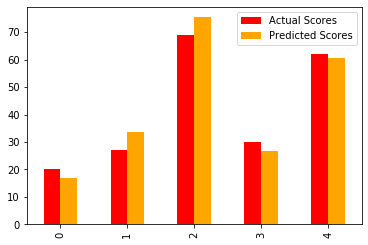

In [18]:
#Plotting the compared data
compare.plot(kind="bar", color =['red','orange'])
plt.show()

## Model Evaluation

In [19]:
#Lets check the accuracy of the model
from sklearn import metrics
mea = metrics.mean_absolute_error(y_test,predictions)
mse = metrics.mean_squared_error(y_test,predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
R2 = metrics.r2_score(y_test,predictions)

In [20]:
print("Mean Absolute Error:",mea)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R-Squared:", R2)

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-Squared: 0.9454906892105356


The R-Squared value is very high indicating that the accuracy of the model is high.

## Predicted Score

In [21]:
array = np.array([9.25])
hour_studied = array.reshape(-1,1)
pred_score = lreg.predict(hour_studied)
print('The predicted score if a student studies for 9.25hr/day is {}'.format(pred_score[0]))

The predicted score if a student studies for 9.25hr/day is 93.69173248737538


## Alternative Approach (Ordinary Least Squares Method)


In [22]:
print("OLS Regression Model for the association between Hours and Scores")
reg1 = smf.ols("Scores ~ Hours",data=data).fit()
print(reg1.summary())

OLS Regression Model for the association between Hours and Scores
                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           9.13e-17
Time:                        19:45:21   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

Findings:    
1) p value for Hours is 0.000 < 0.05 idicating a significant association between our explanatory variable(Hours) and Response variables(Scores)   
2) t value = 21.583 which is positive indicating a strong positive linear association between our explanatory variable(Hours) and Response variables(Scores)   
3) R-squared value is 0.953 indicating that the accuracy of the model is high.

##### Equation for the line of best fit : Scores = 2.4837 + 9.7758 * Hours

In [157]:
#The prediction of score when hours is 9.25
Score = 2.4837 + 9.7758 * 9.25
print(f'The predicted score if a student studies for 9.25hr/day is {Score}')

The predicted score if a student studies for 9.25hr/day is 92.90985
